<h1>Creazione serie storica mensile decessi COVID-19 confermati

In [154]:
import pandas as pd
decessi_covid = pd.read_csv('../csv/serieStorica_decessi_covid19.csv')
decessi_covid.head()

,data,deceduti
0,2020-02-24,7.0
1,2020-02-25,3.0
2,2020-02-26,2.0
3,2020-02-27,5.0
4,2020-02-28,4.0


In [155]:
decessi_covid.data = pd.to_datetime(decessi_covid.data)
decessi_covid.deceduti = pd.to_numeric(decessi_covid.deceduti)

decessi_covid = decessi_covid[decessi_covid['data'] > '2020-02-29']

decessi_covid=decessi_covid.set_index('data')
decessi_covid.head()

,deceduti
data,
2020-03-01,5.0
2020-03-02,18.0
2020-03-03,27.0
2020-03-04,28.0
2020-03-05,41.0


In [156]:
decessi_covid = decessi_covid.groupby(pd.Grouper(freq='M')).sum()
decessi_covid

,deceduti
data,
2020-03-31,12399.0
2020-04-30,15539.0
2020-05-31,5448.0
2020-06-30,1352.0
2020-07-31,374.0
2020-08-31,342.0
2020-09-30,411.0


In [157]:
ts_decessi_covid = decessi_covid.deceduti

<h1> Creazione serie storica mensile dei decessi totali ISTAT

In [158]:
df = pd.read_csv('../csv/serieStorica_decessi_tot.csv')
df.head()

,DATA,TOTALE
0,2015-01-01,2632
1,2015-01-02,2182
2,2015-01-03,2215
3,2015-01-04,2264
4,2015-01-05,2301


In [159]:
df['DATA'] = pd.to_datetime(df['DATA'])
df.TOTALE = pd.to_numeric(df.TOTALE)

In [160]:
#PERIODO COVID
df_covid_period = df[df['DATA'] > '2020-02-29']
df_covid_period.head()

,DATA,TOTALE
1886,2020-03-01,1913
1887,2020-03-02,2029
1888,2020-03-03,2034
1889,2020-03-04,1906
1890,2020-03-05,2097


In [161]:
df_covid_period = df_covid_period.set_index('DATA')
df_covid_period.head()

,TOTALE
DATA,
2020-03-01,1913
2020-03-02,2029
2020-03-03,2034
2020-03-04,1906
2020-03-05,2097


In [162]:
df_covid_period = df_covid_period.groupby(pd.Grouper(freq='M')).sum()
df_covid_period

,TOTALE
DATA,
2020-03-31,86108
2020-04-30,72394
2020-05-31,52102
2020-06-30,48239
2020-07-31,50895
2020-08-31,52960
2020-09-30,48201


In [163]:
ts_covid_period = df_covid_period.TOTALE

<h1>Creazione serie storica predizione modello SARIMA mensile

In [164]:
predictions = pd.read_csv('../csv/predictions_SARIMA.csv')

predictions.dropna(inplace=True)
predictions.head()

,Unnamed: 0,predicted_mean
0,2015-01-31,0.000000
1,2015-02-28,57038.363031
2,2015-03-31,57228.852168
3,2015-04-30,52965.883807
4,2015-05-31,44870.382307


In [165]:
predictions.rename(columns={'Unnamed: 0': 'Data', 'predicted_mean':'Totale'}, inplace=True)
predictions.dropna(inplace=True)
predictions.head()

,Data,Totale
0,2015-01-31,0.000000
1,2015-02-28,57038.363031
2,2015-03-31,57228.852168
3,2015-04-30,52965.883807
4,2015-05-31,44870.382307


In [166]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

#PERIODO COVID
predictions_covid_period = predictions[predictions['Data'] > '2020-02-29']
predictions_covid_period.head()

,Data,Totale
62,2020-03-31,53594.401638
63,2020-04-30,52271.146561
64,2020-05-31,52388.766762
65,2020-06-30,52067.024313
66,2020-07-31,51754.370725


In [167]:
predictions_covid_period = predictions_covid_period.set_index('Data')
predictions_covid_period

,Totale
Data,
2020-03-31,53594.401638
2020-04-30,52271.146561
2020-05-31,52388.766762
2020-06-30,52067.024313
2020-07-31,51754.370725
2020-08-31,51030.466831
2020-09-30,50784.691981


In [168]:
ts_predictions_covid_period = predictions_covid_period.Totale

<h1>Intervalli di confidenza

<h3>Limite massimo

In [169]:
upper = pd.read_csv('../csv/predictions_SARIMA_upper.csv')
upper.head()

,Unnamed: 0,upper TOTALE
0,2015-01-31,7874.703833
1,2015-02-28,64550.343163
2,2015-03-31,64709.696007
3,2015-04-30,60385.318904
4,2015-05-31,52171.639589


In [170]:
upper.rename(columns={'Unnamed: 0': 'Data', 'upper TOTALE':'Totale'}, inplace=True)
upper['Data'] = pd.to_datetime(upper['Data'])
upper.Totale = pd.to_numeric(upper.Totale)
upper.head()

,Data,Totale
0,2015-01-31,7874.703833
1,2015-02-28,64550.343163
2,2015-03-31,64709.696007
3,2015-04-30,60385.318904
4,2015-05-31,52171.639589


In [171]:
upper = upper[upper['Data'] > '2020-02-29']
upper = upper.set_index('Data')
upper

,Totale
Data,
2020-03-31,63693.328520
2020-04-30,62586.035402
2020-05-31,62953.091254
2020-06-30,62772.751758
2020-07-31,62540.163344
2020-08-31,61940.437884
2020-09-30,61870.408978


In [172]:
upper = upper.Totale

<h3>Limite minimo

In [173]:
lower = pd.read_csv('../csv/predictions_SARIMA_lower.csv')
lower.head()

,Unnamed: 0,lower TOTALE
0,2015-01-31,-7874.703833
1,2015-02-28,49526.382899
2,2015-03-31,49748.008329
3,2015-04-30,45546.448711
4,2015-05-31,37569.125025


In [174]:
lower.rename(columns={'Unnamed: 0': 'Data', 'lower TOTALE':'Totale'}, inplace=True)
lower['Data'] = pd.to_datetime(lower['Data'])
lower.Totale = pd.to_numeric(lower.Totale)
lower.head()

,Data,Totale
0,2015-01-31,-7874.703833
1,2015-02-28,49526.382899
2,2015-03-31,49748.008329
3,2015-04-30,45546.448711
4,2015-05-31,37569.125025


In [175]:
lower = lower[lower['Data'] > '2020-02-29']
lower = lower.set_index('Data')
lower

,Totale
Data,
2020-03-31,43495.474756
2020-04-30,41956.257721
2020-05-31,41824.442269
2020-06-30,41361.296868
2020-07-31,40968.578106
2020-08-31,40120.495777
2020-09-30,39698.974984


In [176]:
lower = lower.Totale

<h1> CONFRONTO DELLE SERIE STORICHE NEI MESI DI MARZO, APRILE, MAGGIO, GIUGNO, LUGLIO, AGOSTO E SETTEMBRE 2020

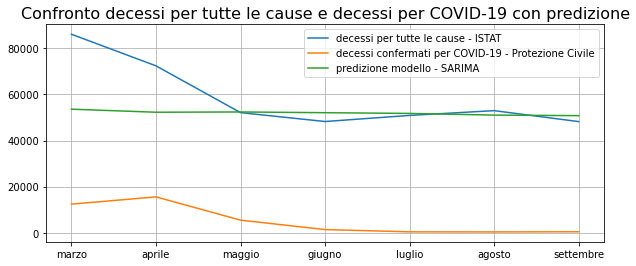

In [177]:
import matplotlib.pyplot as plt
m = ['marzo', 'aprile', 'maggio', 'giugno', 'luglio', 'agosto', 'settembre']
plt.figure(figsize=(10,4))
plt.title('Confronto decessi per tutte le cause e decessi per COVID-19 con predizione', size=16)
plt.plot(m, ts_covid_period, label='decessi per tutte le cause - ISTAT')
plt.plot(m, ts_decessi_covid,label='decessi confermati per COVID-19 - Protezione Civile')
plt.plot(m, ts_predictions_covid_period, label='predizione modello - SARIMA')
plt.grid()
plt.legend()
plt.show()

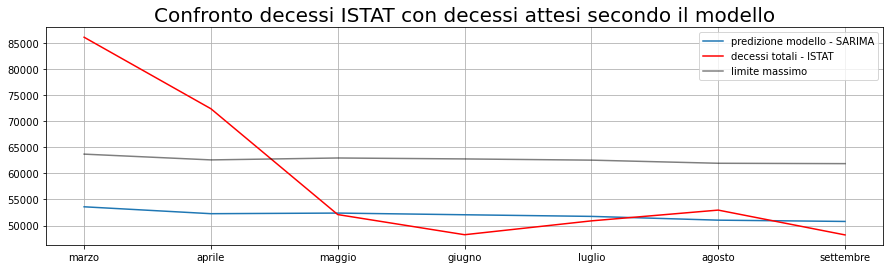

In [178]:
plt.figure(figsize=(15,4))
m = ['marzo', 'aprile', 'maggio', 'giugno', 'luglio', 'agosto', 'settembre']
plt.title('Confronto decessi ISTAT con decessi attesi secondo il modello', size=20)
plt.plot(m, ts_predictions_covid_period, label='predizione modello - SARIMA')
plt.plot(m, ts_covid_period, color='red', label='decessi totali - ISTAT')
plt.plot(m, upper, label='limite massimo', color='k',alpha=.5)
plt.grid()
#plt.plot(x, lower, label='limite minimo')
plt.legend()
plt.show()

<p> <b>n:</b> decessi covid secondo il modello
    <br />
    <b>ts_covid_period:</b> decessi totali registrati dell'ISAT dal mese di marzo al mese di settembre 2020
    <br />
    <b>ts_predictions_covid_period:</b> decessi previsti dal modello dal mese di marzo al mese di settembre 2020 
</p>

In [179]:
d = ts_covid_period.sum()
print("Decessi 2020:", d)

Decessi 2020: 410899


In [180]:
d_m = ts_predictions_covid_period.sum()
print("Decessi attesi dal modello 2020:", d_m)

Decessi attesi dal modello 2020: 363890.86881055904


In [181]:
d_lower = lower.sum()
print("Decessi attesi dal modello 2020 - livello minimo:", d_lower)

Decessi attesi dal modello 2020 - livello minimo: 289425.52048179135


<h2>Calcolo dei decessi COVID-19 secondo il modello predittivo</h2>

Differenza tra i decessi totali rilasciati dall'ISTAT e i decessi secondo la previsione del modello SARIMA.

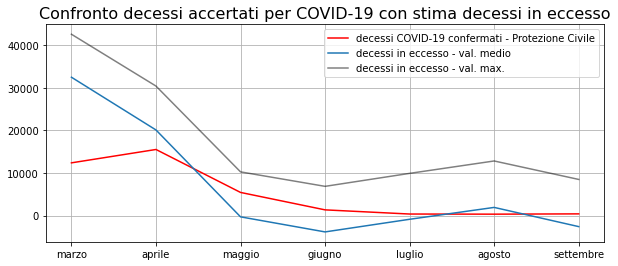

In [182]:
n = ts_covid_period - ts_predictions_covid_period #decessi per tutte le cause ISTAT - predizione modello SARIMA
n_upper = ts_covid_period - lower
n_lower = ts_covid_period - upper

plt.figure(figsize=(10,4))
m = ['marzo', 'aprile', 'maggio', 'giugno', 'luglio', 'agosto', 'settembre']
plt.title('Confronto decessi accertati per COVID-19 con stima decessi in eccesso', size=16)
plt.plot(m, ts_decessi_covid, color='red', label='decessi COVID-19 confermati - Protezione Civile')
plt.plot(m, n, label='decessi in eccesso - val. medio')
plt.plot(m, n_upper, label='decessi in eccesso - val. max.', color='k',alpha=.5)
#plt.plot(x, n_lower,label='limite minimo - modello SARIMA')
plt.grid()
plt.legend()
plt.show()

<h3>Numero totale dei decessi accertati COVID-19 nei mesi di marzo, aprile, maggio, giugno, luglio, agosto e settembre 2020

In [183]:
m = ts_decessi_covid.sum()
print(m)

35865.0


<h3>Numero totale dei decessi COVID-19 previsti dal modello SARIMA nei mesi di marzo, aprile, maggio, giugno, luglio, agosto e settembre 2020</h3>

<h4>Valore medio

In [184]:
total = n.sum()
print(total)

47008.131189440996


In [185]:
n

DATA
2020-03-31    32513.598362
2020-04-30    20122.853439
2020-05-31     -286.766762
2020-06-30    -3828.024313
2020-07-31     -859.370725
2020-08-31     1929.533169
2020-09-30    -2583.691981
Freq: M, dtype: float64

<h4>Valore massimo

In [186]:
total_upper = n_upper.sum()
print(total_upper)

121473.47951820868


In [187]:
n_upper

DATA
2020-03-31    42612.525244
2020-04-30    30437.742279
2020-05-31    10277.557731
2020-06-30     6877.703132
2020-07-31     9926.421894
2020-08-31    12839.504223
2020-09-30     8502.025016
Freq: M, dtype: float64

<h4>Valore minimo

In [188]:
total_lower = n_lower.sum()
print(total_lower)

-27457.217139326727


In [189]:
n_lower

DATA
2020-03-31    22414.671480
2020-04-30     9807.964598
2020-05-31   -10851.091254
2020-06-30   -14533.751758
2020-07-31   -11645.163344
2020-08-31    -8980.437884
2020-09-30   -13669.408978
Freq: M, dtype: float64

<h3>Stima del numero dei decessi COVID-19 non registrati secondo il modello predittivo SARIMA nei mesi di marzo, aprile, maggio, giugno, luglio, agosto e settembre 2020

<h4>Valore medio

In [190]:
x = ts_covid_period - ts_predictions_covid_period - ts_decessi_covid
x

DATA
2020-03-31    20114.598362
2020-04-30     4583.853439
2020-05-31    -5734.766762
2020-06-30    -5180.024313
2020-07-31    -1233.370725
2020-08-31     1587.533169
2020-09-30    -2994.691981
Freq: M, dtype: float64

In [191]:
print(x.sum())

11143.131189440996


<h4>Valore massimo

In [192]:
x_upper = ts_covid_period - lower - ts_decessi_covid
x_upper

DATA
2020-03-31    30213.525244
2020-04-30    14898.742279
2020-05-31     4829.557731
2020-06-30     5525.703132
2020-07-31     9552.421894
2020-08-31    12497.504223
2020-09-30     8091.025016
Freq: M, dtype: float64

In [193]:
print(x_upper.sum())

85608.47951820868


<h4>Valore minimo

In [194]:
x_lower = ts_covid_period - upper - ts_decessi_covid
x_lower

DATA
2020-03-31    10015.671480
2020-04-30    -5731.035402
2020-05-31   -16299.091254
2020-06-30   -15885.751758
2020-07-31   -12019.163344
2020-08-31    -9322.437884
2020-09-30   -14080.408978
Freq: M, dtype: float64

In [195]:
print(x_lower.sum())

-63322.21713932673


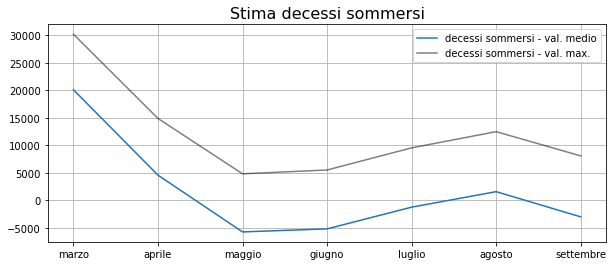

In [196]:
plt.figure(figsize=(10,4))
m = ['marzo', 'aprile', 'maggio', 'giugno', 'luglio', 'agosto', 'settembre']
plt.title('Stima decessi sommersi', size=16)
#plt.plot(m, ts_decessi_covid, color='red', label='decessi COVID-19 confermati - Protezione Civile')
plt.plot(m, x, label='decessi sommersi - val. medio')
plt.plot(m, x_upper, label='decessi sommersi - val. max.', color='k',alpha=.5)
#plt.plot(m, x, n_lower,label='limite minimo - modello SARIMA')
plt.grid()
plt.legend()
plt.show()